# Descriptive statistics of ecological features in soil

### Import modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Read dataframe with all ecological information

In [10]:
# Read dataframe with ecological information but removing zero-inflated features
df_path = './inputs/FQ_enzim_agras_hong_func_CLASIF_remove_zero_inflated.csv'
all_data = pd.read_csv(df_path, index_col=0, sep ='\t')

In [19]:
all_data.head()

,Bact_total,Lumbricina,Formicidae,Coleoptera,Araneae,Diplopoda,Larvas,Enchytraeidae,Macrofauna,Oribatida,...,Pelobacter,Prevotella,Reyranella,Rhodoplanes,Solirubrobacter,Sphingomonas,Tellurimicrobium,Thermodesulfobium,Thermovenabulum,Vicinamibacter
taxon,,,,,,,,,,,,,,,,,,,,,
BPF12,1006,240,720,160,0,0,240,3280,4960,188439,...,1,2,5,15,6,8,5,23,17,39
BPF14,978,0,160,0,160,0,160,4720,5200,178253,...,3,2,4,16,4,14,2,16,10,60
BPF22,987,0,5520,80,0,0,480,3680,9840,366693,...,2,0,5,21,4,11,0,12,4,38
BPF24,1012,400,4000,80,80,0,320,8000,12880,509295,...,3,1,5,17,1,3,2,9,6,30
BPF32,973,80,23840,400,160,0,240,1520,26400,269927,...,0,0,3,19,3,11,6,13,3,41


## Data manipulation

In [20]:
# Subset by index starting with BP, MP, and NA (treatments)
bp_data = all_data[all_data.index.str.startswith('BP')]
mp_data = all_data[all_data.index.str.startswith('MP')]
na_data = all_data[all_data.index.str.startswith('NA')]

In [ ]:
# Check correct subsetting
(len(bp_data) + len(mp_data) + len(na_data)) == len(all_data)

True

## Descriptive statistics

In [27]:
lists_of_data = [bp_data, mp_data, na_data]

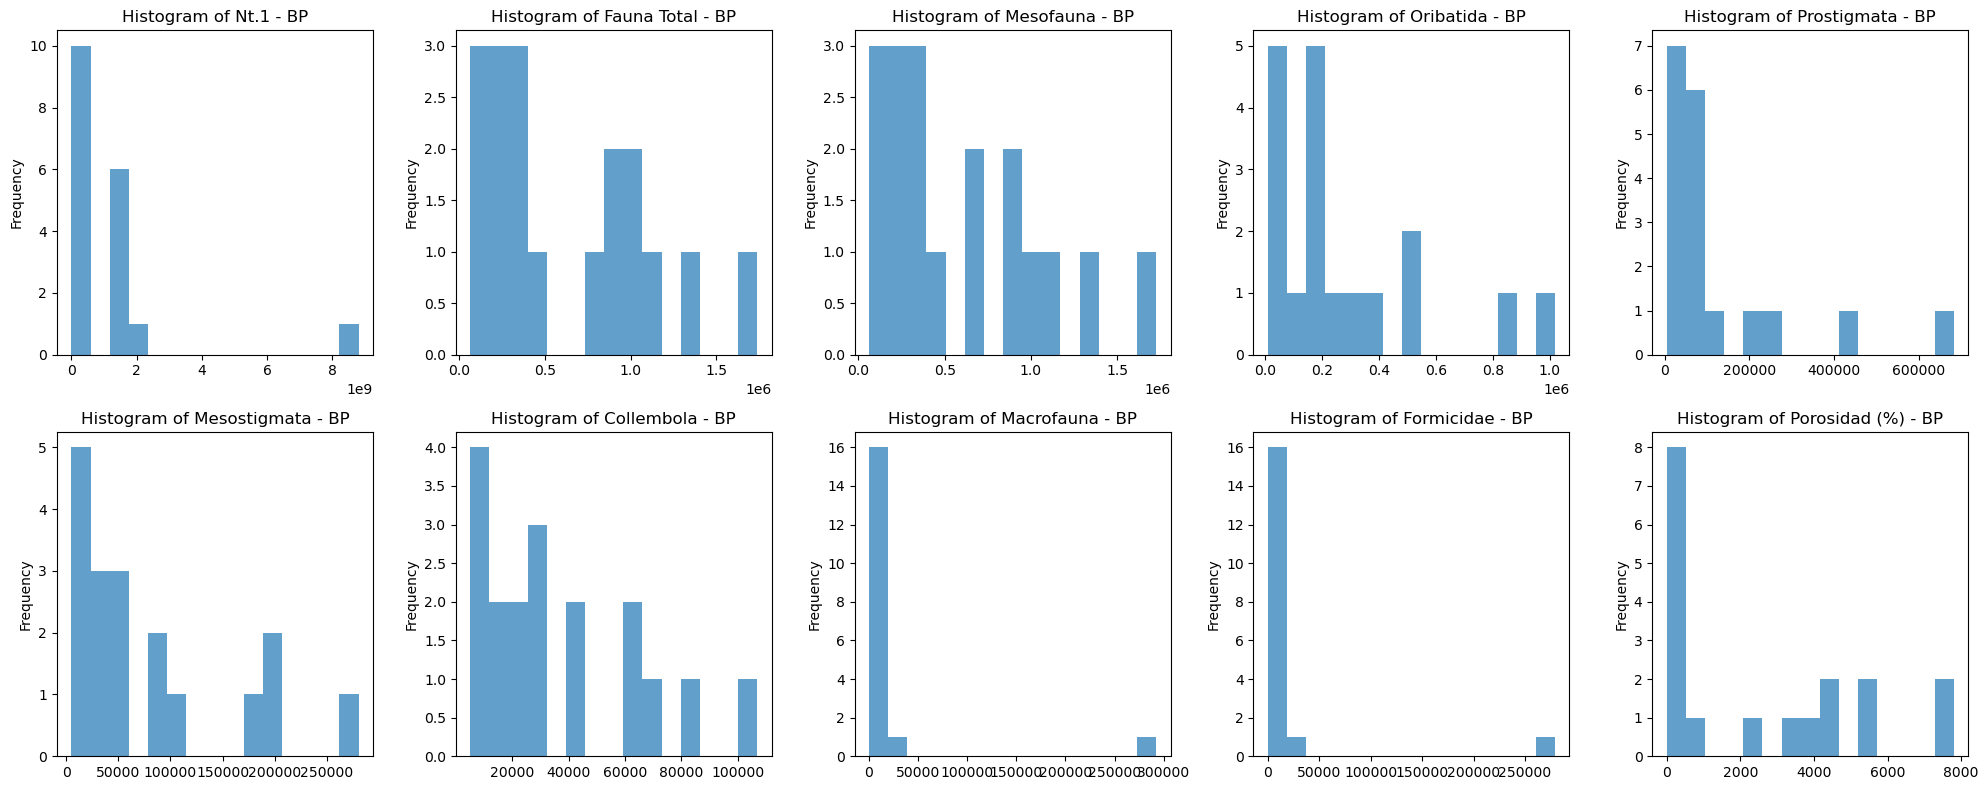

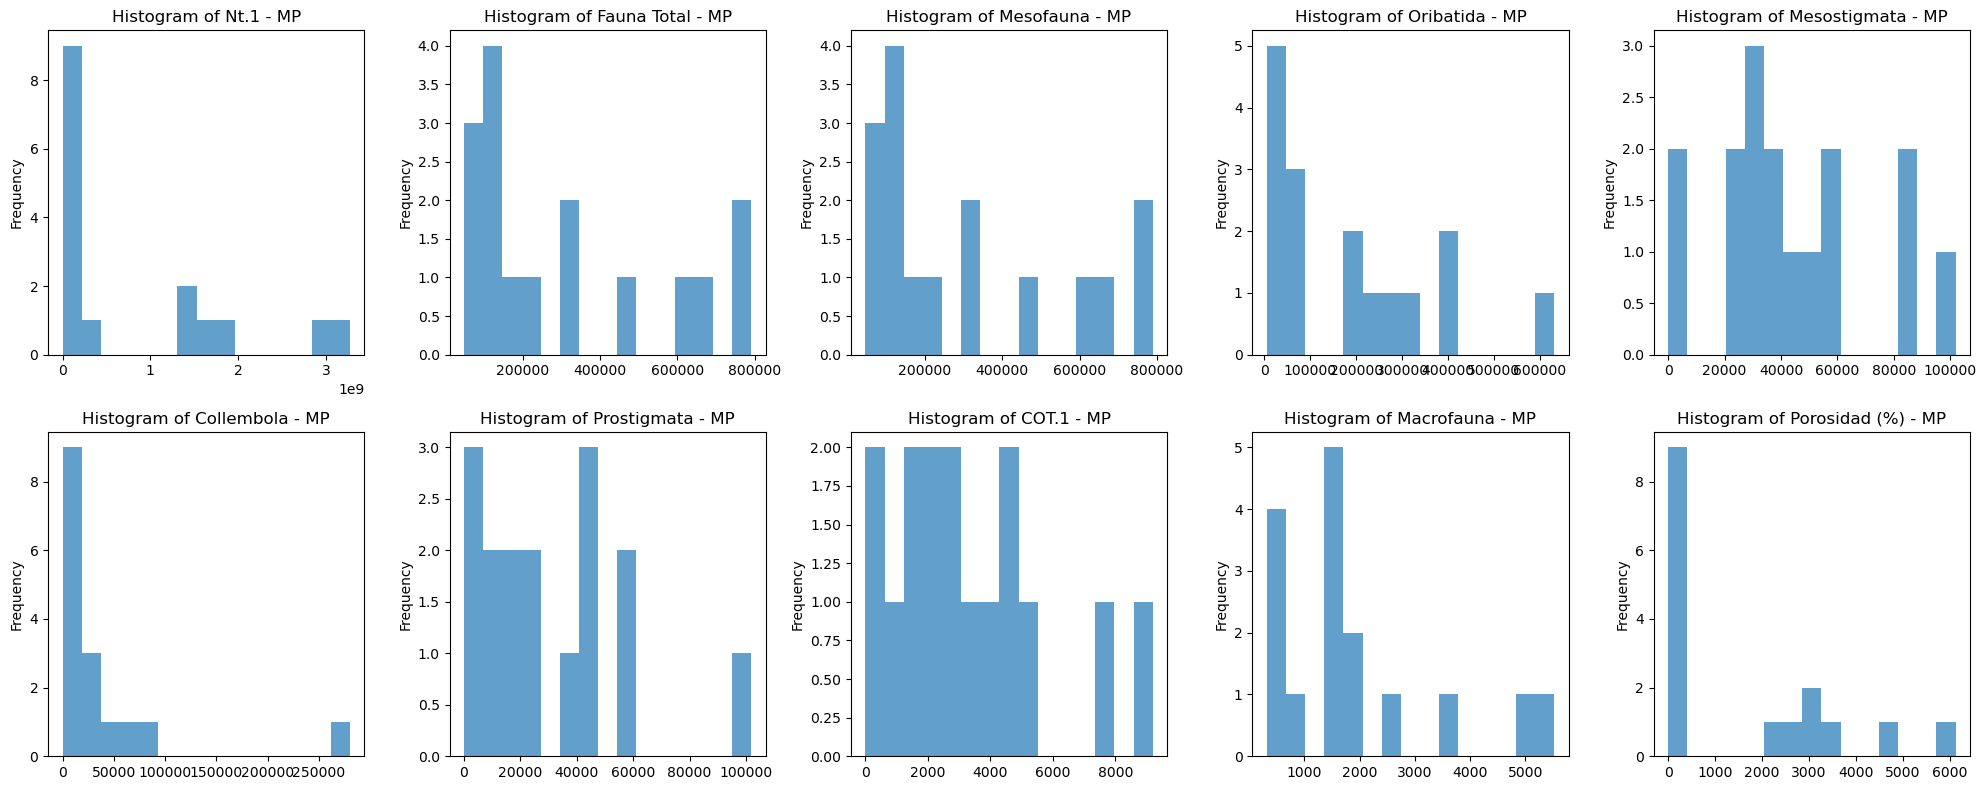

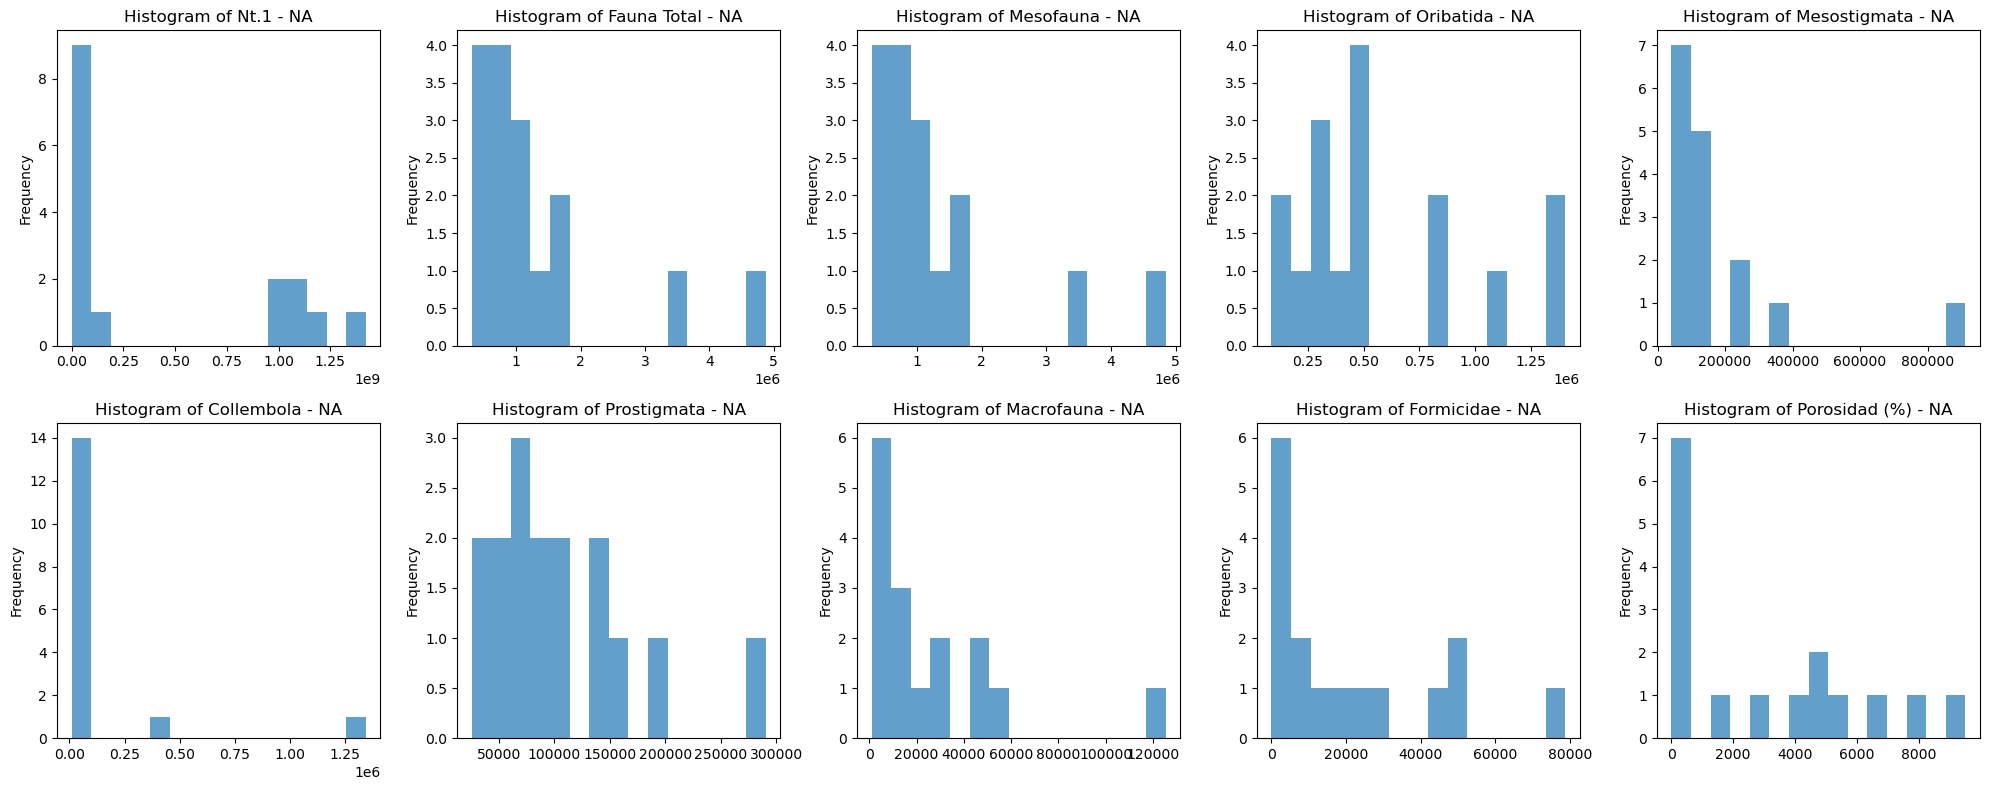

In [29]:
for treatment in lists_of_data:

    # Get mean abundance for each variable
    mean_abundance = treatment.mean().sort_values(ascending=False)

    # Select top 10 variables
    top10_vars = mean_abundance.head(10).index.tolist()

    # Plot histograms for top 10 variables
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()
    for i, var in enumerate(top10_vars):
        treatment[var].plot.hist(ax=axes[i], bins=15, alpha=0.7)
        axes[i].set_title(f'Histogram of {var} - {treatment.index[0][:2]}')
    plt.tight_layout()
    plt.show()

### Make biplot to see the representation of the variables projected in the principal components of the samples

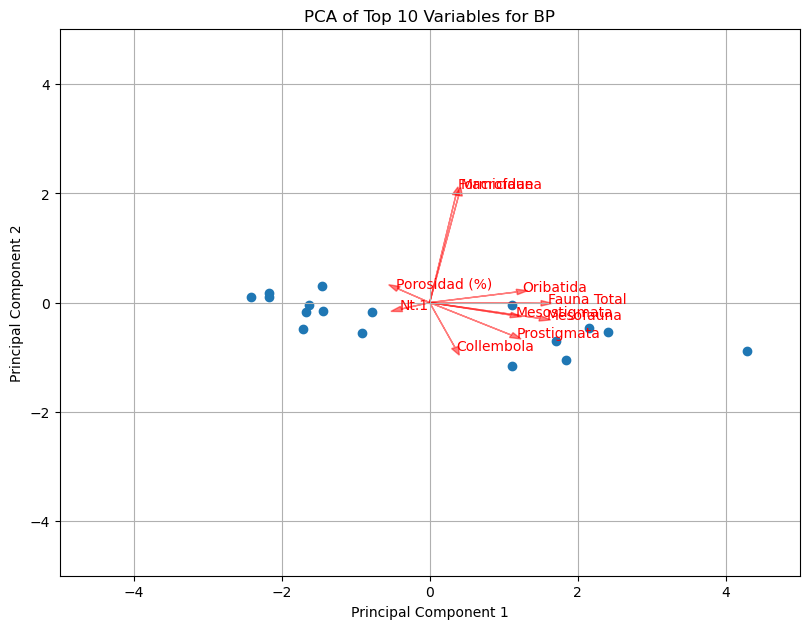

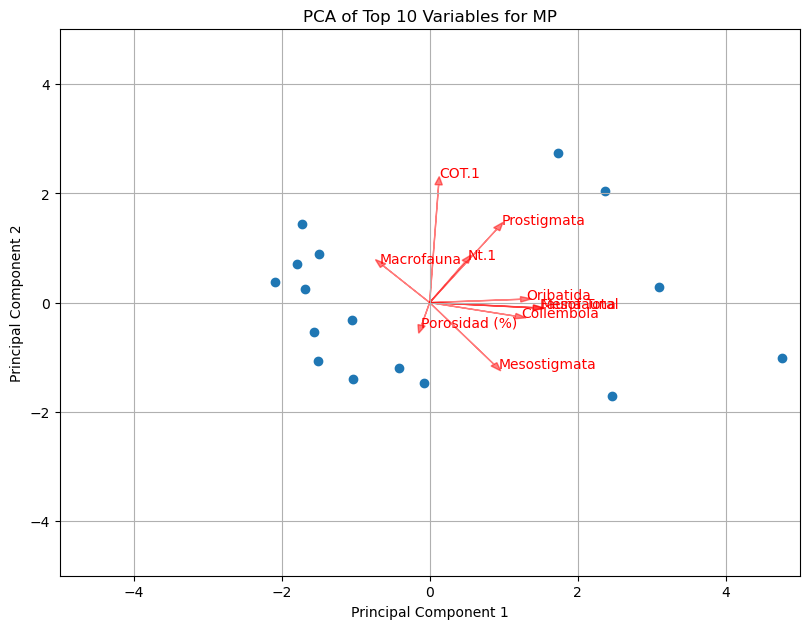

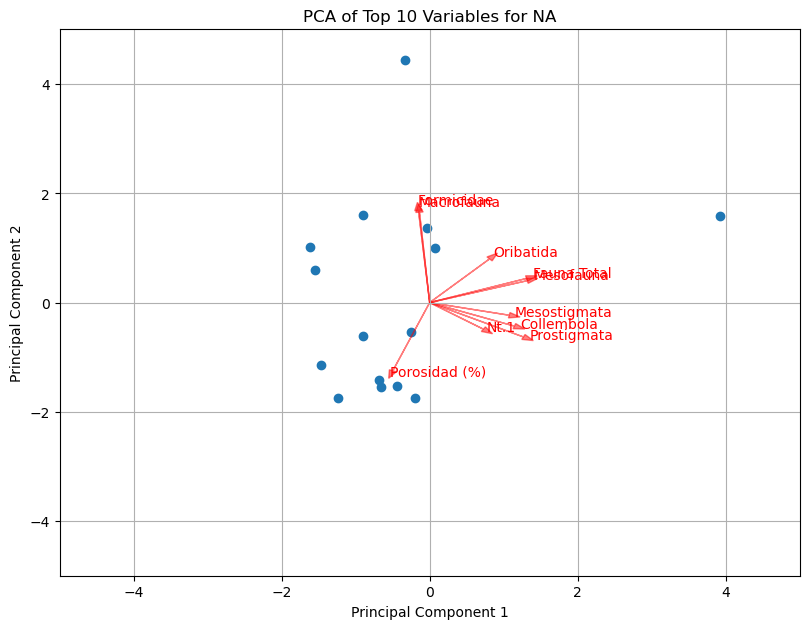

In [34]:
for treatment in lists_of_data:

    # Get mean abundance for each variable
    mean_abundance = treatment.mean().sort_values(ascending=False)

    # Select top 10 variables
    top10_vars = mean_abundance.head(10).index.tolist()

    # Standardize the data for PCA
    scaler = StandardScaler()
    treatment_scaled = scaler.fit_transform(treatment[top10_vars])

    # Perform PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(treatment_scaled)

    # Plot PCA results
    plt.figure(figsize=(8,6))
    plt.scatter(principal_components[:, 0], principal_components[:, 1])
    # Get PCA loadings
    loadings = pca.components_.T

    for i, var in enumerate(top10_vars):
        plt.arrow(0, 0, loadings[i, 0]*3, loadings[i, 1]*3, color='r', alpha=0.5, head_width=0.1)
        plt.text(loadings[i, 0]*3.2, loadings[i, 1]*3.2, var, color='r', fontsize=10)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.tight_layout()
    plt.title('PCA of Top 10 Variables for ' + treatment.index[0][:2])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()